In [1]:
from nav_sim_modules.actioner.hueristic_autonomous_actioner.actioner import HeuristicAutonomousActioner
from nav_sim_modules.scener.chest_search_room.scener import ChestSearchRoomScener

import numpy as np
import matplotlib.pyplot as plt


scene = ChestSearchRoomScener()
scene.generate_scene()

robot = HeuristicAutonomousActioner()
pose = scene.spawn()
robot.initialize(env_pixel=scene.env_pixel, global_pose=pose)

/home/tagokeniot/hypo_workspace/hypo/.venv/lib/python3.8/site-packages/quaternion/numba_wrapper.py:23: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


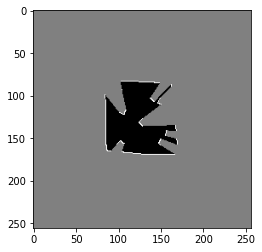

In [2]:
occ = np.copy(robot.occupancy_map)
occ[occ==-1] = 50
plt.imshow(occ, cmap='gray')

In [3]:
robot.pose

(0.9205294904090175, -1.360903688212614, -1.6468088424437324)

In [4]:
robot.do_action([1.0,-1.0,0])

start: (137, 114, -1.6468088424437324), goal: (137, 118, 0)
found!
found!


In [5]:
robot.pose

(0.9, -1.0, 0)

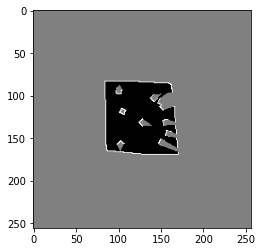

In [6]:
occ2 = np.copy(robot.occupancy_map)
occ2[occ2==-1] = 50
plt.imshow(occ2, cmap='gray')

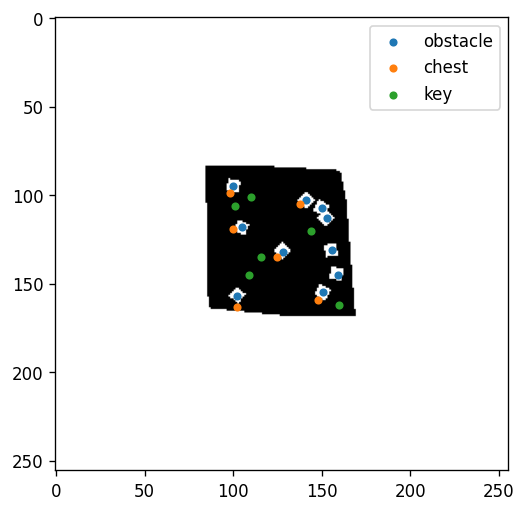

In [7]:
occ3 = np.copy(scene.env_pixel)
occ3[occ3==-1] = 50

plt.figure(figsize=(5,5), dpi=120)

obs = scene.components_info['obstacle']
che = scene.components_info['chest']
key = scene.components_info['key']

plt.imshow(occ3, cmap='gray')

obs_xy = np.array([robot.navs.con2pix(o) for o in obs])
che_xy = np.array([robot.navs.con2pix(c) for c in che])
key_xy = np.array([robot.navs.con2pix(k) for k in key])

plt.scatter(obs_xy[:,0], obs_xy[:,1], s=15)
plt.scatter(che_xy[:,0], che_xy[:,1], s=15)
plt.scatter(key_xy[:,0], key_xy[:,1], s=15)
plt.legend(["obstacle", "chest", "key"])